<a href="https://colab.research.google.com/github/DSKashif/MachineLearningProject-ML1/blob/main/ML1_PREDICTING_BEJINGS_AIR_POLLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<a name = Section1></a>
# **1. Introduction**
---

# **Airifi**

**Company Introduction**

Your client for this project is an air purifier company.

1. One of the leading Global pollution controller organizations.
2. The company is working its way for the betterment of the society by using advanced technologies to purify the air by removing harmful particles from the atmosphere.

**Current Scenario**

1. As we know in recent years the pollution emitted per day has increased drastically, countries all around the world are taking up actions in order to tackle the rapid increase in pollution to avoid global warming.
2. Beijing’s pollution authority has collected data for the past 5 years and the data has been passed on to your client by the government of China.
3. The company calculates pollution using traditional or manual methods, so it needs a model to do the long process.

---
<a name = Section2></a>
# **2. Problem Statement**
---

**Currently, Beijing is suffering from:**

1. China is notorious for being a major polluter. Its economic growth in the past three decades has been the fastest among major nations, which is the main factor in why China has extensive air pollution.
2. China’s Environmental Sustainability Index is ranked near the bottom among countries worldwide.
3. Air Pollution in Beijing is mainly dominated by coal combustion and vehicles running on the roads.
4. With this amplified wealth, individuals are more capable of affording motor vehicles. 
5. The number of motor vehicles on Beijing’s roads has doubled to 3.3 million with nearly 1200 added each day.

**Airifi has hired you as a data science consultant. They want you to come up with actionable insights and a model that could help predict pollution.**

1. They expect a model that could predict the daily pollution emission for Beijing.
2. The idea is to use the model in order to take further action to reduce the pollution rate.

---
<a name = Section3></a>
# **3. Importing and Installing Libraries**
---

In [1]:
# Basic Libraries

import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
import plotly.graph_objects as go                                   # Importing to make interactive plots                    
from plotly.subplots import make_subplots                           # Importing to create subplots in plotly
%matplotlib inline

import time                                                         # Importing to calculate time
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

In [2]:
data = pd.read_csv("/content/drive/Othercomputers/My Laptop/INSAID/Capstone Project/Predict Beijing air pollution/Beijing-Air/beijing_train.csv")
print('Shape of the dataset:', data.shape)
data.head()

Shape of the dataset: (403776, 18)


REF_NO  year  month  day  hour   PM2.5    PM10      SO2      NO2        CO  \
0       1  2013      3    1     0 4.00000 4.00000  4.00000  7.00000 300.00000   
1       2  2013      3    1     1 8.00000 8.00000  4.00000  7.00000 300.00000   
2       3  2013      3    1     2 7.00000 7.00000  5.00000 10.00000 300.00000   
3       4  2013      3    1     3 6.00000 6.00000 11.00000 11.00000 300.00000   
4       5  2013      3    1     4 3.00000 3.00000 12.00000 12.00000 300.00000   

        O3     TEMP       PRES      DEWP    RAIN   wd    WSPM       station  
0 77.00000 -0.70000 1023.00000 -18.80000 0.00000  NNW 4.40000  Aotizhongxin  
1 77.00000 -1.10000 1023.20000 -18.20000 0.00000    N 4.70000  Aotizhongxin  
2 73.00000 -1.10000 1023.50000 -18.20000 0.00000  NNW 5.60000  Aotizhongxin  
3 72.00000 -1.40000 1024.50000 -19.40000 0.00000   NW 3.10000  Aotizhongxin  
4 72.00000 -2.00000 1025.20000 -19.50000 0.00000    N 2.00000  Aotizhongxin

<a name = Section5></a>

---
# **5. Data PreProfiling**
---

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


To check the missing value

In [4]:
data.isnull().sum()   # to find the missing data column wise

REF_NO         0
year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64

In [5]:
data['REF_NO'].nunique()

33648

In [6]:
data.describe()

REF_NO         year        month          day         hour  \
count 403776.00000 403776.00000 403776.00000 403776.00000 403776.00000   
mean   16824.50000   2014.56419      6.73538     15.74822     11.50000   
std     9713.35295      1.09750      3.35648      8.80889      6.92220   
min        1.00000   2013.00000      1.00000      1.00000      0.00000   
25%     8412.75000   2014.00000      4.00000      8.00000      5.75000   
50%    16824.50000   2015.00000      7.00000     16.00000     11.50000   
75%    25236.25000   2016.00000     10.00000     23.00000     17.25000   
max    33648.00000   2016.00000     12.00000     31.00000     23.00000   

             PM2.5         PM10          SO2          NO2           CO  \
count 395301.00000 397554.00000 395000.00000 391917.00000 383515.00000   
mean      79.24828    104.32790     15.73306     50.35278   1214.84334   
std       79.14671     90.13640     21.73946     34.77191   1124.28568   
min        2.00000      2.00000      0.28560      1.02650    100.00000   
25%       21.00000     36.00000      2.00000     23.00000    500.00000   
50%       55.00000     83.00000      7.00000     43.00000    900.00000   
75%      110.00000    145.00000     19.00000     71.00000   1500.00000   
max      999.00000    999.00000    500.00000    290.00000  10000.00000   

                O3         TEMP         PRES         DEWP         RAIN  \
count 390769.00000 403512.00000 403511.00000 403507.00000 403515.00000   
mean      58.11933     14.08890   1010.28253      3.15729      0.06705   
std       57.37597     11.30353     10.35678     13.61727      0.83784   
min        0.21420    -19.90000    982.40000    -43.40000      0.00000   
25%       11.00000      4.00000   1002.00000     -8.00000      0.00000   
50%       45.00000     15.40000   1009.80000      4.20000      0.00000   
75%       83.00000     23.50000   1018.30000     15.50000      0.00000   
max     1071.00000     41.60000   1042.80000     29.10000     72.50000   

              WSPM  
count 403538.00000  
mean       1.71838  
std        1.23796  
min        0.00000  
25%        0.90000  
50%        1.40000  
75%        2.20000  
max       13.20000

In [7]:
data.describe(include = 'all')

REF_NO         year        month          day         hour  \
count  403776.00000 403776.00000 403776.00000 403776.00000 403776.00000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean    16824.50000   2014.56419      6.73538     15.74822     11.50000   
std      9713.35295      1.09750      3.35648      8.80889      6.92220   
min         1.00000   2013.00000      1.00000      1.00000      0.00000   
25%      8412.75000   2014.00000      4.00000      8.00000      5.75000   
50%     16824.50000   2015.00000      7.00000     16.00000     11.50000   
75%     25236.25000   2016.00000     10.00000     23.00000     17.25000   
max     33648.00000   2016.00000     12.00000     31.00000     23.00000   

              PM2.5         PM10          SO2          NO2           CO  \
count  395301.00000 397554.00000 395000.00000 391917.00000 383515.00000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       79.24828    104.32790     15.73306     50.35278   1214.84334   
std        79.14671     90.13640     21.73946     34.77191   1124.28568   
min         2.00000      2.00000      0.28560      1.02650    100.00000   
25%        21.00000     36.00000      2.00000     23.00000    500.00000   
50%        55.00000     83.00000      7.00000     43.00000    900.00000   
75%       110.00000    145.00000     19.00000     71.00000   1500.00000   
max       999.00000    999.00000    500.00000    290.00000  10000.00000   

                 O3         TEMP         PRES         DEWP         RAIN  \
count  390769.00000 403512.00000 403511.00000 403507.00000 403515.00000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       58.11933     14.08890   1010.28253      3.15729      0.06705   
std        57.37597     11.30353     10.35678     13.61727      0.83784   
min         0.21420    -19.90000    982.40000    -43.40000      0.00000   
25%        11.00000      4.00000   1002.00000     -8.00000      0.00000   
50%        45.00000     15.40000   1009.80000      4.20000      0.00000   
75%        83.00000     23.50000   1018.30000     15.50000      0.00000   
max      1071.00000     41.60000   1042.80000     29.10000     72.50000   

            wd         WSPM       station  
count   402387 403538.00000        403776  
unique      16          NaN            12  
top         NE          NaN  Aotizhongxin  
freq     40049          NaN         33648  
mean       NaN      1.71838           NaN  
std        NaN      1.23796           NaN  
min        NaN      0.00000           NaN  
25%        NaN      0.90000           NaN  
50%        NaN      1.40000           NaN  
75%        NaN      2.20000           NaN  
max        NaN     13.20000           NaN

In [8]:
data.head()

REF_NO  year  month  day  hour   PM2.5    PM10      SO2      NO2        CO  \
0       1  2013      3    1     0 4.00000 4.00000  4.00000  7.00000 300.00000   
1       2  2013      3    1     1 8.00000 8.00000  4.00000  7.00000 300.00000   
2       3  2013      3    1     2 7.00000 7.00000  5.00000 10.00000 300.00000   
3       4  2013      3    1     3 6.00000 6.00000 11.00000 11.00000 300.00000   
4       5  2013      3    1     4 3.00000 3.00000 12.00000 12.00000 300.00000   

        O3     TEMP       PRES      DEWP    RAIN   wd    WSPM       station  
0 77.00000 -0.70000 1023.00000 -18.80000 0.00000  NNW 4.40000  Aotizhongxin  
1 77.00000 -1.10000 1023.20000 -18.20000 0.00000    N 4.70000  Aotizhongxin  
2 73.00000 -1.10000 1023.50000 -18.20000 0.00000  NNW 5.60000  Aotizhongxin  
3 72.00000 -1.40000 1024.50000 -19.40000 0.00000   NW 3.10000  Aotizhongxin  
4 72.00000 -2.00000 1025.20000 -19.50000 0.00000    N 2.00000  Aotizhongxin

In [9]:
data['wd'].unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

In [10]:
data['wd'].count()

402387

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    395301 non-null  float64
 6   PM10     397554 non-null  float64
 7   SO2      395000 non-null  float64
 8   NO2      391917 non-null  float64
 9   CO       383515 non-null  float64
 10  O3       390769 non-null  float64
 11  TEMP     403512 non-null  float64
 12  PRES     403511 non-null  float64
 13  DEWP     403507 non-null  float64
 14  RAIN     403515 non-null  float64
 15  wd       402387 non-null  object 
 16  WSPM     403538 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


No duplicate rows in the data

Handling Missing values

In [12]:
100*(data.shape[0]-data.count())/data.shape[0]

REF_NO    0.00000
year      0.00000
month     0.00000
day       0.00000
hour      0.00000
PM2.5     2.09894
PM10      1.54095
SO2       2.17348
NO2       2.93702
CO        5.01788
O3        3.22134
TEMP      0.06538
PRES      0.06563
DEWP      0.06662
RAIN      0.06464
wd        0.34400
WSPM      0.05894
station   0.00000
dtype: float64

We get the below data of missing values **Total- 403776**
1. PM2.5       8475 - Replace with Median
2. PM10        6222 - Replace with Median
3. SO2         8776 - Replace with Median
4. NO2        11859 - Replace with Median
5. CO         20261 - Replace with Median
6. O3         13007 - Replace with Median
7. TEMP         264 - Replace with Median
8. PRES         265 - Replace with Median
9. DEWP         269 - Replace with Median
10. RAIN         261 - Replace with Median
11. wd          1389 - Replace with Mode
12. WSPM         238 - Replace with Median

<a name = Section6></a>

---
# **6. Data PreProcessing**
---

**Now replacing the missing values with Mode for categorical variable and Median for continuous variable**

In [13]:
data['PM2.5'] = data['PM2.5'].replace(np.nan, data['PM2.5'].median())

In [14]:
data['PM10'] = data['PM10'].replace(np.nan, data['PM10'].median())
data['SO2'] = data['SO2'].replace(np.nan, data['SO2'].median())
data['NO2'] = data['NO2'].replace(np.nan, data['NO2'].median())
data['CO'] = data['CO'].replace(np.nan, data['CO'].median())
data['O3'] = data['O3'].replace(np.nan, data['O3'].median())
data['TEMP'] = data['TEMP'].replace(np.nan, data['TEMP'].median())
data['PRES'] = data['PRES'].replace(np.nan, data['PRES'].median())
data['DEWP'] = data['DEWP'].replace(np.nan, data['DEWP'].median())
data['RAIN'] = data['RAIN'].replace(np.nan, data['RAIN'].median())
data['wd'] = data['wd'].replace(np.nan, data['wd'].mode()[0])
data['WSPM'] = data['WSPM'].replace(np.nan, data['WSPM'].median())


In [15]:
100*(data.shape[0]-data.count())/data.shape[0]

REF_NO    0.00000
year      0.00000
month     0.00000
day       0.00000
hour      0.00000
PM2.5     0.00000
PM10      0.00000
SO2       0.00000
NO2       0.00000
CO        0.00000
O3        0.00000
TEMP      0.00000
PRES      0.00000
DEWP      0.00000
RAIN      0.00000
wd        0.00000
WSPM      0.00000
station   0.00000
dtype: float64

Now the data set is complete and clean and we can proceed further

<a name = Section7></a>

---
# **7. Data Post Profiling**
---

In [16]:
data.describe(include='all')

REF_NO         year        month          day         hour  \
count  403776.00000 403776.00000 403776.00000 403776.00000 403776.00000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean    16824.50000   2014.56419      6.73538     15.74822     11.50000   
std      9713.35295      1.09750      3.35648      8.80889      6.92220   
min         1.00000   2013.00000      1.00000      1.00000      0.00000   
25%      8412.75000   2014.00000      4.00000      8.00000      5.75000   
50%     16824.50000   2015.00000      7.00000     16.00000     11.50000   
75%     25236.25000   2016.00000     10.00000     23.00000     17.25000   
max     33648.00000   2016.00000     12.00000     31.00000     23.00000   

              PM2.5         PM10          SO2          NO2           CO  \
count  403776.00000 403776.00000 403776.00000 403776.00000 403776.00000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       78.73932    103.99924     15.54325     50.13683   1199.04487   
std        78.38879     89.47780     21.53958     34.27996   1097.86869   
min         2.00000      2.00000      0.28560      1.02650    100.00000   
25%        21.00000     37.00000      2.28480     24.00000    500.00000   
50%        55.00000     83.00000      7.00000     43.00000    900.00000   
75%       109.00000    144.00000     19.00000     70.00000   1500.00000   
max       999.00000    999.00000    500.00000    290.00000  10000.00000   

                 O3         TEMP         PRES         DEWP         RAIN  \
count  403776.00000 403776.00000 403776.00000 403776.00000 403776.00000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       57.69671     14.08976   1010.28222      3.15799      0.06701   
std        56.49177     11.29989     10.35339     13.61276      0.83758   
min         0.21420    -19.90000    982.40000    -43.40000      0.00000   
25%        12.00000      4.00000   1002.00000     -8.00000      0.00000   
50%        45.00000     15.40000   1009.80000      4.20000      0.00000   
75%        82.00000     23.50000   1018.30000     15.50000      0.00000   
max      1071.00000     41.60000   1042.80000     29.10000     72.50000   

            wd         WSPM       station  
count   403776 403776.00000        403776  
unique      16          NaN            12  
top         NE          NaN  Aotizhongxin  
freq     41438          NaN         33648  
mean       NaN      1.71819           NaN  
std        NaN      1.23762           NaN  
min        NaN      0.00000           NaN  
25%        NaN      0.90000           NaN  
50%        NaN      1.40000           NaN  
75%        NaN      2.20000           NaN  
max        NaN     13.20000           NaN

In [17]:
data.duplicated().sum()

0

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   REF_NO   403776 non-null  int64  
 1   year     403776 non-null  int64  
 2   month    403776 non-null  int64  
 3   day      403776 non-null  int64  
 4   hour     403776 non-null  int64  
 5   PM2.5    403776 non-null  float64
 6   PM10     403776 non-null  float64
 7   SO2      403776 non-null  float64
 8   NO2      403776 non-null  float64
 9   CO       403776 non-null  float64
 10  O3       403776 non-null  float64
 11  TEMP     403776 non-null  float64
 12  PRES     403776 non-null  float64
 13  DEWP     403776 non-null  float64
 14  RAIN     403776 non-null  float64
 15  wd       403776 non-null  object 
 16  WSPM     403776 non-null  float64
 17  station  403776 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 55.5+ MB


Now we will proceed for Exploratory Data Analysis

<a name = Section8></a>

---
# **8. Exploratory Data Analysis**
---

Lets do UNivariate analysis of some important columns

In [19]:
data.columns

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

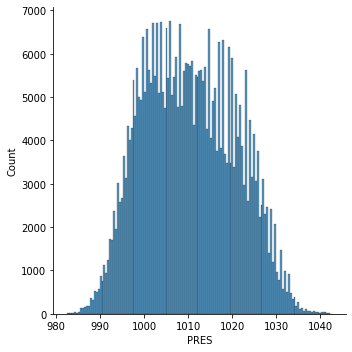

In [20]:
sns.displot(data, x="PRES")

Onle PRES is Normally distributed

Now we will do bivariate analysis

Pollution Vs Year

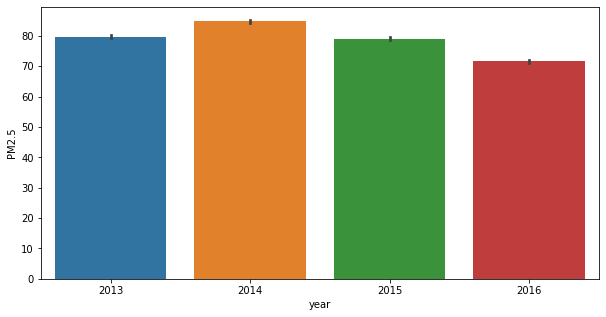

In [21]:
plt.figure(figsize=(10,5))
sns.barplot(x=data['year'],
            y=data['PM2.5'])
plt.show()

2014 has the highest level of pollution

Which month has highest pollution level

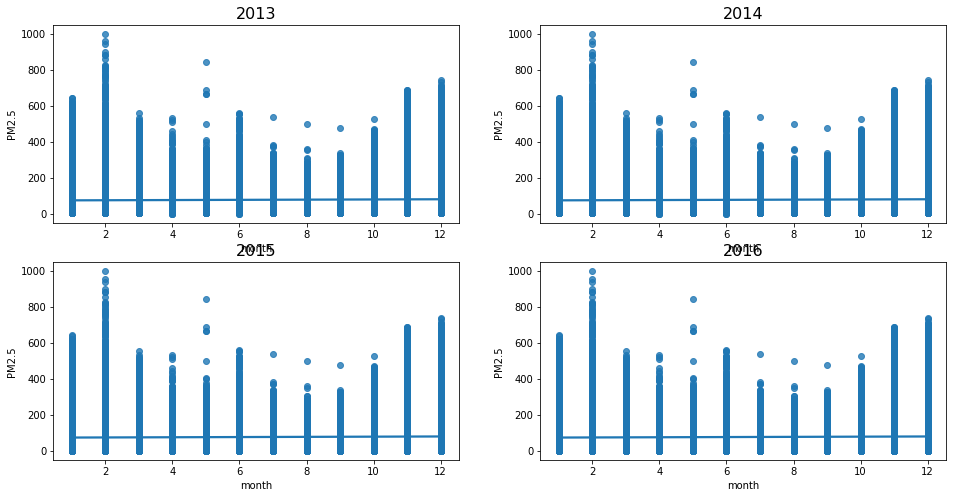

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
#sns.barplot(x=data['month'],
 #           y=data['PM2.5'])
#plt.show()


#Create plots
sns.regplot(x=data['month'], y=data['PM2.5'], data=data[data['year']==2013], ax=ax[0, 0], ci=None)
sns.regplot(x=data['month'], y=data['PM2.5'], data=data[data['year']==2014], ax=ax[0, 1], ci=None)
sns.regplot(x=data['month'], y=data['PM2.5'], data=data[data['year']==2015], ax=ax[1, 0], ci=None)
sns.regplot(x=data['month'], y=data['PM2.5'], data=data[data['year']==2016], ax=ax[1, 1], ci=None)

ax[0, 0].set_title(label='2013', fontsize=16)
ax[0, 1].set_title(label='2014', fontsize=16)
ax[1, 0].set_title(label='2015', fontsize=16)
ax[1, 1].set_title(label='2016', fontsize=16)


plt.show()

In [24]:
data.columns

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

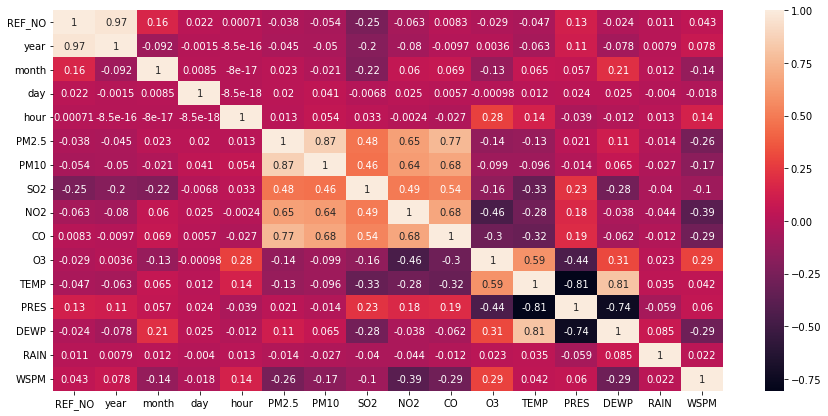

In [25]:
paper = plt.figure(figsize = [15,7]) # for large graph
sns.heatmap(data.corr(), annot = True)


**PM2.5 Vs O3**

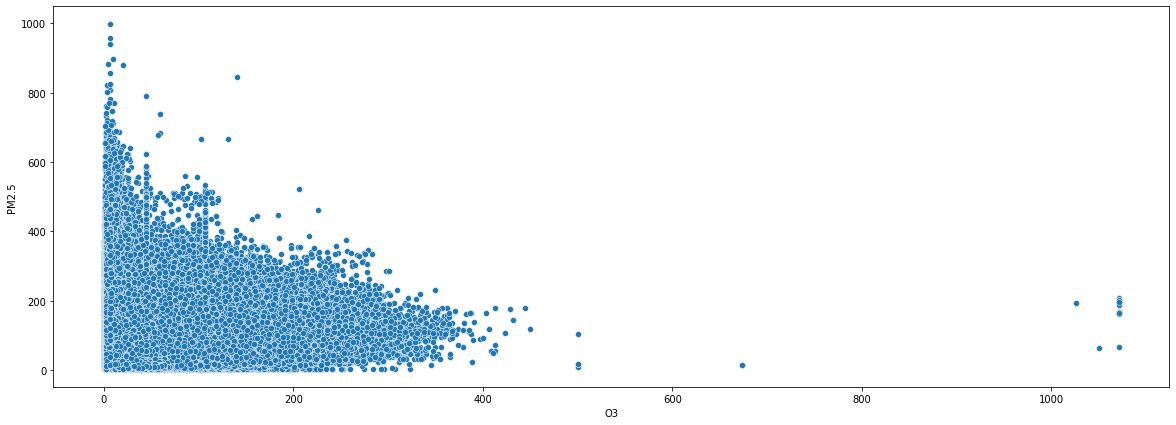

In [26]:
paper = plt.figure(figsize=[20,7])

  # Create a scatterplot for age vs bloodpressure
sns.scatterplot(x='O3', y='PM2.5',  data=data)

<a name = Section9></a>

---
# **9. X Y Split**
---

In [22]:
X  = data.drop(["REF_NO","PM2.5","station"], axis =1)
Y = data["PM2.5"]

---
<a name = Section10></a>
# **10. Train Test Split**
---

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shape of the train and test sets
print('Training Data Shape:', x_train.shape, y_train.shape)
print('Testing Data Shape:', x_test.shape, y_test.shape)

Training Data Shape: (323020, 15) (323020,)
Testing Data Shape: (80756, 15) (80756,)


---
<a name = Section11></a>
# **11. Splitting into categorical (cat) and continuous(cont)**
---

In [69]:
X.head()

year  month  day  hour    PM10      SO2      NO2        CO       O3  \
0  2013      3    1     0 4.00000  4.00000  7.00000 300.00000 77.00000   
1  2013      3    1     1 8.00000  4.00000  7.00000 300.00000 77.00000   
2  2013      3    1     2 7.00000  5.00000 10.00000 300.00000 73.00000   
3  2013      3    1     3 6.00000 11.00000 11.00000 300.00000 72.00000   
4  2013      3    1     4 3.00000 12.00000 12.00000 300.00000 72.00000   

      TEMP       PRES      DEWP    RAIN   wd    WSPM  
0 -0.70000 1023.00000 -18.80000 0.00000  NNW 4.40000  
1 -1.10000 1023.20000 -18.20000 0.00000    N 4.70000  
2 -1.10000 1023.50000 -18.20000 0.00000  NNW 5.60000  
3 -1.40000 1024.50000 -19.40000 0.00000   NW 3.10000  
4 -2.00000 1025.20000 -19.50000 0.00000    N 2.00000

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403776 entries, 0 to 403775
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    403776 non-null  int64  
 1   month   403776 non-null  int64  
 2   day     403776 non-null  int64  
 3   hour    403776 non-null  int64  
 4   PM10    403776 non-null  float64
 5   SO2     403776 non-null  float64
 6   NO2     403776 non-null  float64
 7   CO      403776 non-null  float64
 8   O3      403776 non-null  float64
 9   TEMP    403776 non-null  float64
 10  PRES    403776 non-null  float64
 11  DEWP    403776 non-null  float64
 12  RAIN    403776 non-null  float64
 13  wd      403776 non-null  object 
 14  WSPM    403776 non-null  float64
dtypes: float64(10), int64(4), object(1)
memory usage: 46.2+ MB


In [24]:
x_train_cat = x_train.select_dtypes(include = ["object"])
x_train_cont = x_train.select_dtypes(exclude = ["object"])

x_test_cat = x_test.select_dtypes(include = ["object"])
x_test_cont = x_test.select_dtypes(exclude = ["object"])

---
<a name = Section12></a>
# **12. Encoding and Scaling**
---

---
<a name = Section12.1></a>
## **12A. Encoding** (Only on Categorical data)
---

In [25]:
# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first', sparse = False) # It will drop first column and Create the Encoder and with spare false we will get data as array not Matrix
enc.fit(x_train_cat) # ONly on categorical data and Train data only
enc.categories_

[array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)]

In [26]:
x_train_OHE = enc.transform(x_train_cat)
x_test_OHE = enc.transform(x_test_cat)

# BY doing above we get type of data i.e. x_train_OHE or X_test_OHE as ndarray data type but we need as data frame



In [27]:
x_train_OHE = pd.DataFrame(enc.transform(x_train_cat))

In [28]:
x_train_OHE.head()

0       1       2       3       4       5       6       7       8   \
0 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
1 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
2 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000 0.00000   
3 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000 0.00000   
4 0.00000 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000   

       9       10      11      12      13      14  
0 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  
1 0.00000 0.00000 0.00000 1.00000 0.00000 0.00000  
2 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  
3 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  
4 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000

In [29]:
x_train_OHE = pd.DataFrame(enc.transform(x_train_cat), columns = enc.get_feature_names_out(), index = x_train_cat.index)

In [30]:
x_train_OHE.head()

wd_ENE  wd_ESE    wd_N   wd_NE  wd_NNE  wd_NNW   wd_NW    wd_S  \
125954 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
115652 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
400825 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000   
208031 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000   
40493  0.00000 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000 0.00000   

         wd_SE  wd_SSE  wd_SSW   wd_SW    wd_W  wd_WNW  wd_WSW  
125954 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  
115652 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000 0.00000  
400825 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  
208031 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  
40493  0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000

In [31]:
x_test_OHE = pd.DataFrame(enc.transform(x_test_cat), columns = enc.get_feature_names(),  index = x_test_cat.index)

In [32]:
x_test_OHE.head()

x0_ENE  x0_ESE    x0_N   x0_NE  x0_NNE  x0_NNW   x0_NW    x0_S  \
94761  0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
295101 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
187229 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   
146611 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000   
398054 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000   

         x0_SE  x0_SSE  x0_SSW   x0_SW    x0_W  x0_WNW  x0_WSW  
94761  0.00000 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000  
295101 0.00000 0.00000 0.00000 0.00000 0.00000 1.00000 0.00000  
187229 1.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  
146611 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000 0.00000  
398054 0.00000 0.00000 1.00000 0.00000 0.00000 0.00000 0.00000

---
<a name = Section12.2></a>
## **12B. Scaling** (Only for Continuous data)
---

In [33]:
# We will go for Standard Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_cont) # .fit is used on continuous data and train data only

StandardScaler()

In [34]:
scaler.transform(x_train_cont) # But here result will be in array

x_train_s = pd.DataFrame(scaler.transform(x_train_cont), columns =x_train_cont.columns , index = x_train_cont.index)

x_test_s = pd.DataFrame(scaler.transform(x_test_cont), columns =x_train_cont.columns , index = x_test_cont.index)

---
<a name = Section13></a>
# **13. Concating two data set** (After Encoding and scaling)
---

In [35]:
x_train_comb = pd.concat([x_train_OHE , x_train_s], axis = 1)
x_test_comb = pd.concat([x_test_OHE , x_test_s], axis = 1)

---
<a name = Section14></a>
# **14. EDA 2** (Assumption check)
---

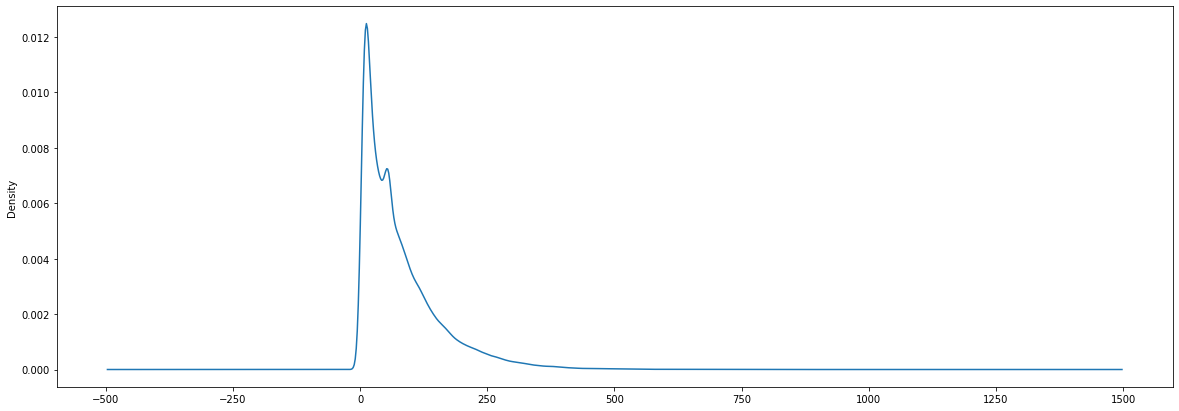

In [36]:
# Assumption check
# 1. Normality of Y (only Y train)


paper = plt.figure(figsize=[20,7])
y_train.plot.kde() 

As the graph is scwed, lets take the log

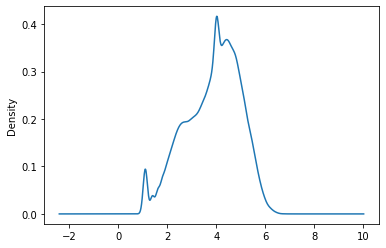

In [37]:
TV_train = np.log(y_train)
TV_train.plot.kde()

In [38]:
y_train.describe()

count   323020.00000
mean        78.69145
std         78.41607
min          2.00000
25%         21.00000
50%         55.00000
75%        109.00000
max        999.00000
Name: PM2.5, dtype: float64

In [39]:
TV_train.describe()

count   323020.00000
mean         3.84996
std          1.11514
min          0.69315
25%          3.04452
50%          4.00733
75%          4.69135
max          6.90675
Name: PM2.5, dtype: float64

After LOg we got the max possible normal curve, hence now we will take the log of test also to move ahead

In [40]:
TV_test = np.log(y_test)

In [41]:
# 2. Linearity between X and Y (We will use pair plot)

# Here we can only check with continious data Hence we can start with below code

data.select_dtypes(exclude=['object']).columns # This will only select continuous data from original dataframe

Index(['REF_NO', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'],
      dtype='object')

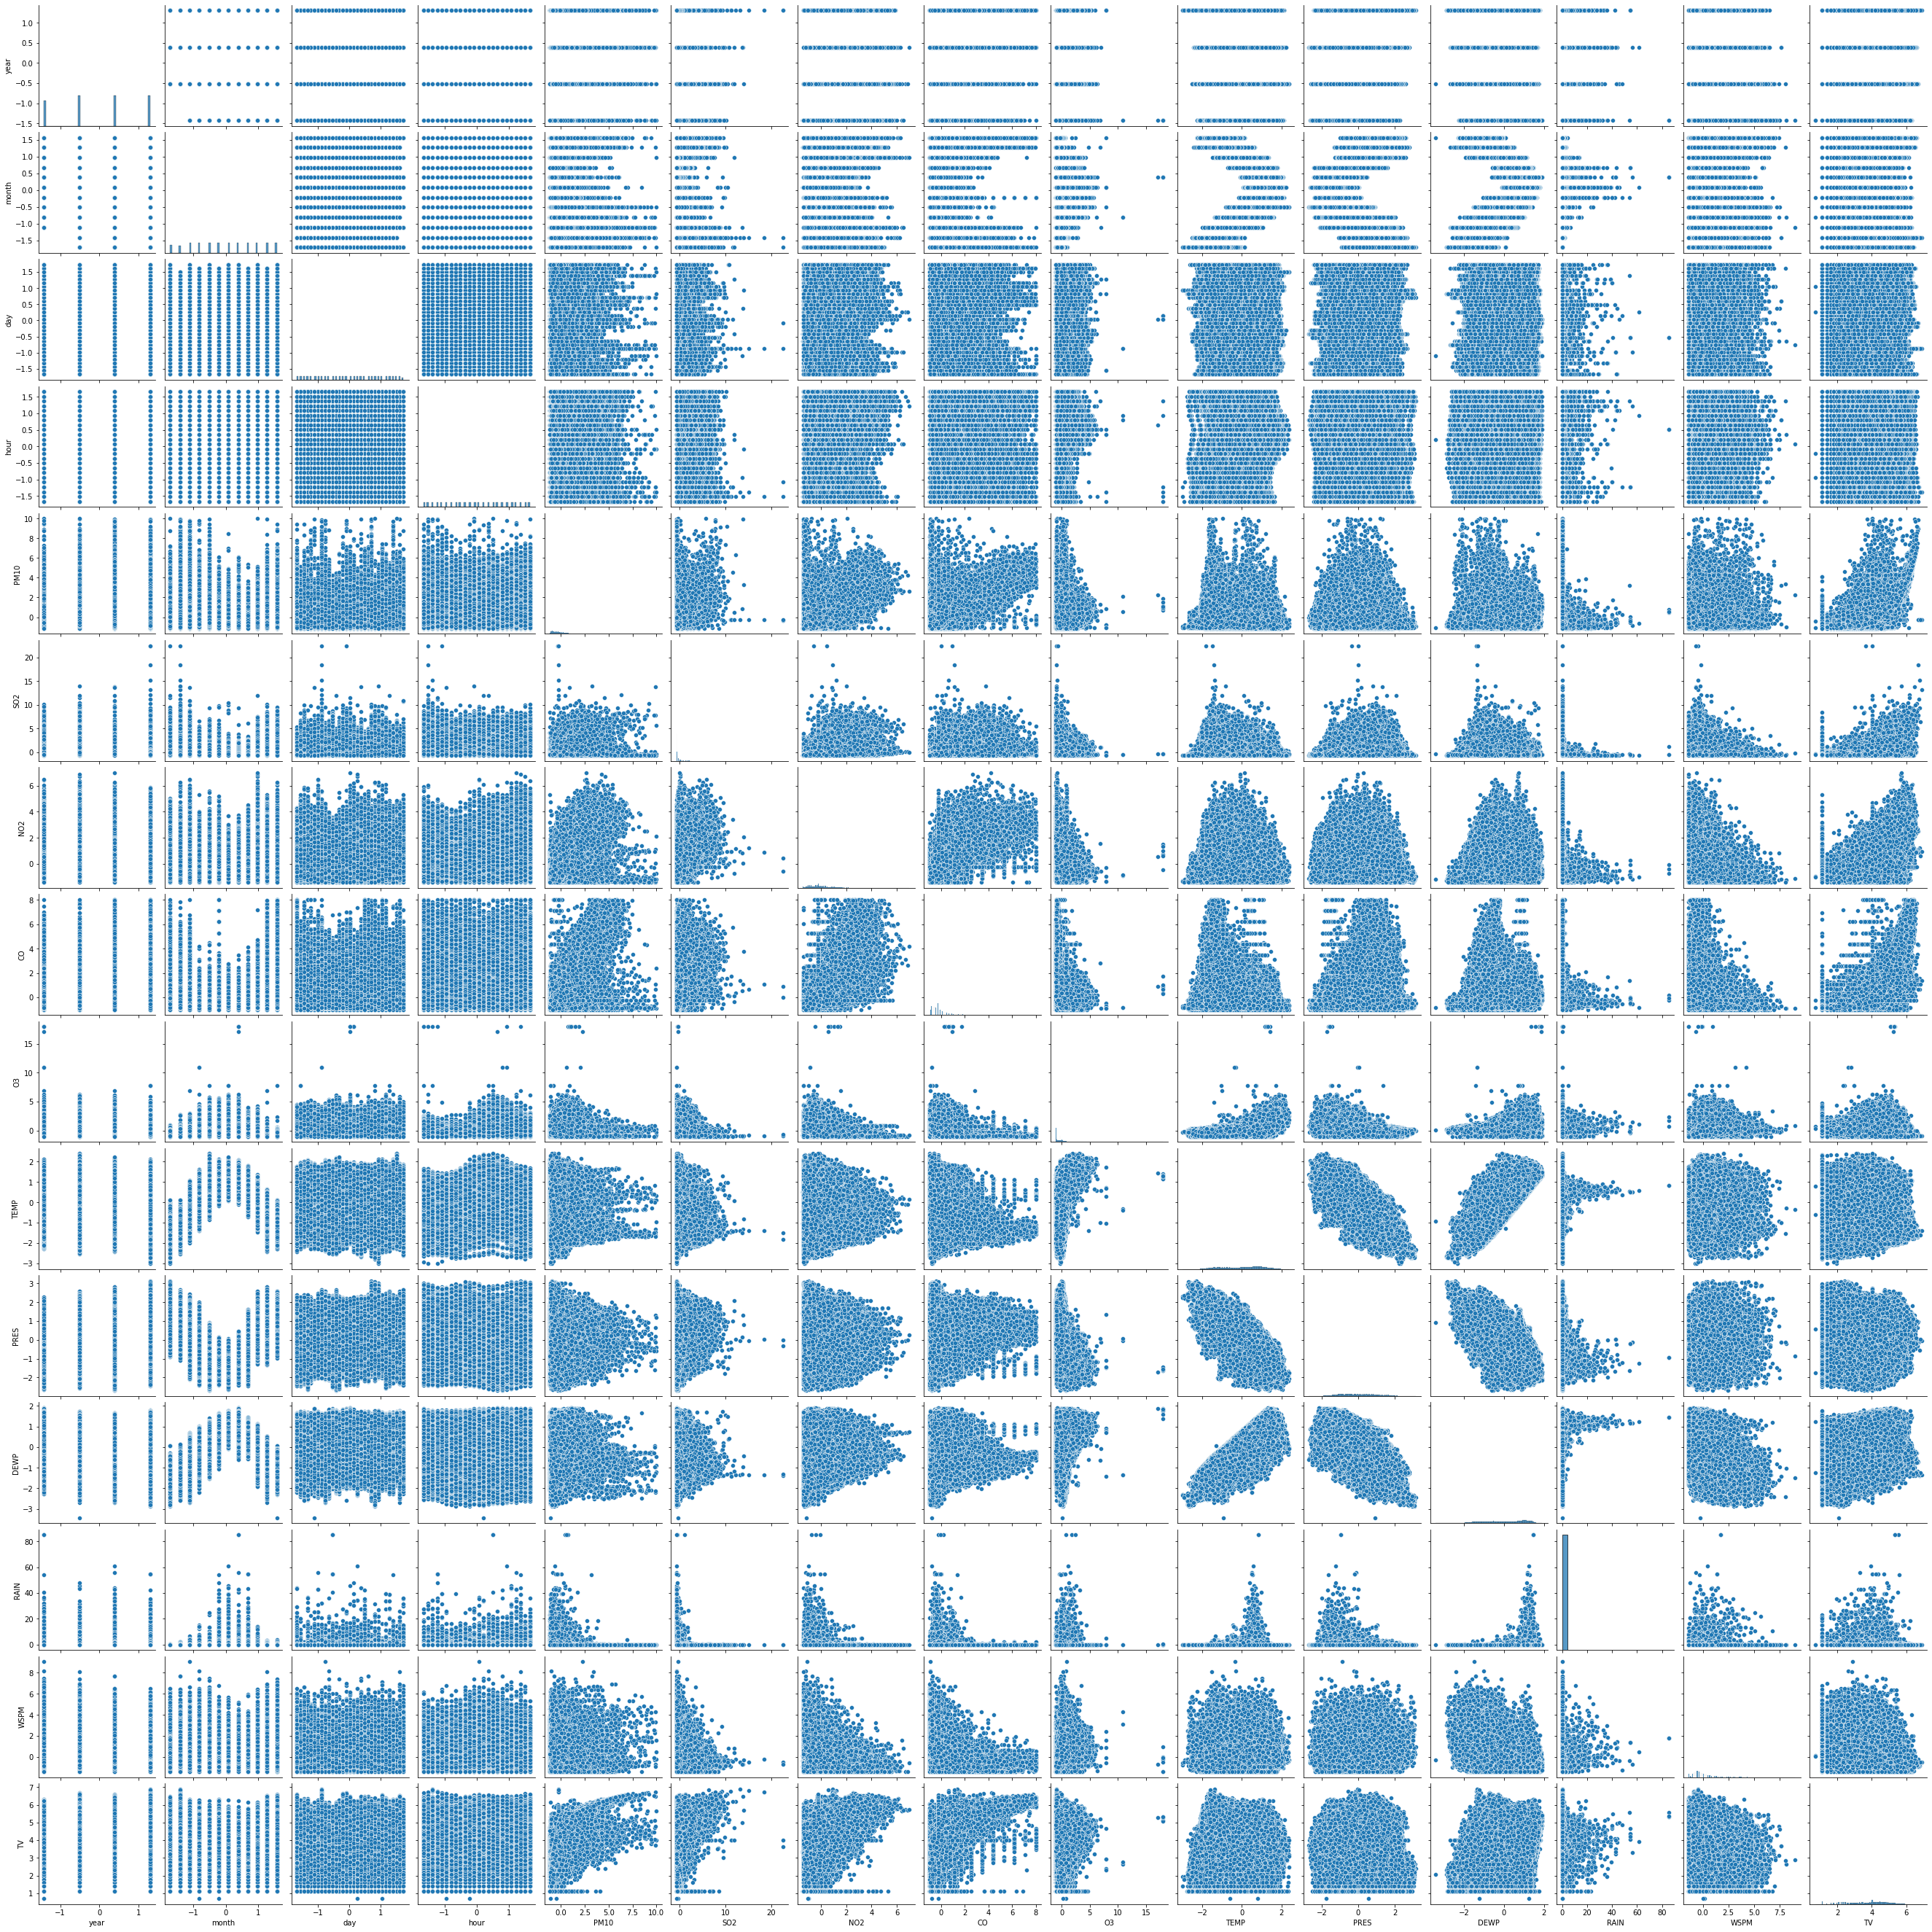

In [50]:
## Now with these columns, we have to check these with Target variable so for that we will make a dataframe with columns and target variable

temp_df = x_train_comb[['year', 'month', 'day', 'hour', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].copy()

temp_df['TV'] = TV_train

sns.pairplot(temp_df)

#Here our most focus is on the last row charts

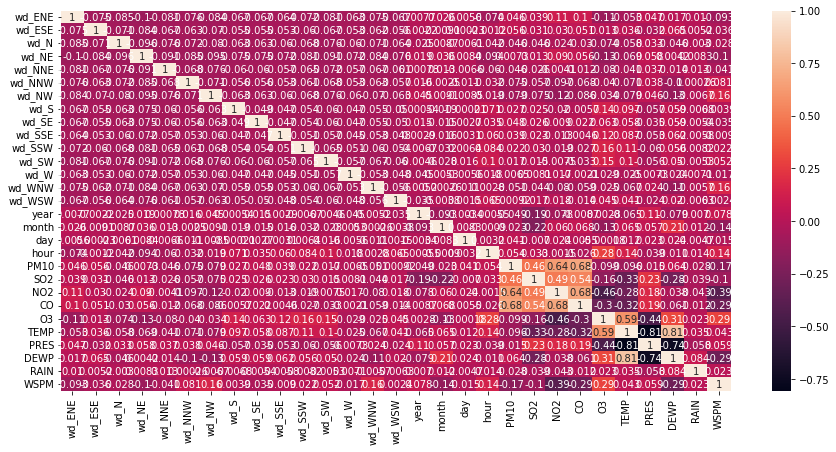

In [51]:
# 3. Multi Colinearity (Here we will use Heatmap)

paper = plt.figure(figsize = [15,7]) # for large graph
sns.heatmap(x_train_comb.corr(), annot = True)

We can see almost no correlation 

---
<a name = Section15></a>
# **15. Feature Selection** (PCA)
---

In [42]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
pca.fit(x_train_comb)


PCA(n_components=0.99)

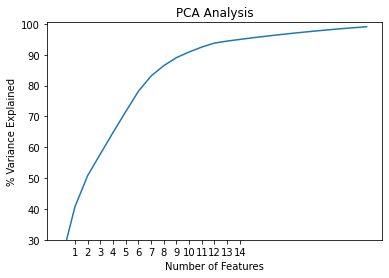

In [43]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.xticks(np.arange(1,15))
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [44]:
def generate_pca(X_train=None, X_test=None):
    pca = PCA(n_components=14, random_state=0)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    print('Shape of train set after PCA reduction:', X_train.shape)
    print('Shape of test set after PCA reduction:', X_test.shape)
    return X_train, X_test

In [45]:
x_train_pca, x_test_pca = generate_pca(X_train=x_train_comb, X_test=x_test_comb)

Shape of train set after PCA reduction: (323020, 14)
Shape of test set after PCA reduction: (80756, 14)


Initially we will do without PCA and then we will apply PCA to see the changes

---
<a name = Section16></a>
# **16. ML Models** 
---

In [92]:
x_test_pca.shape

(80756, 14)

In [90]:
x_train_pca.shape

(323020, 14)

In [46]:
TV_train.shape

(323020,)

---
<a name = Section16.1></a>
## **16a. Linear Regression**
---

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg = LinearRegression()
linreg.fit(x_train_comb, y_train) 

LinearRegression()

In [67]:
#from sklearn.linear_model import LinearRegression
#Lreg = LinearRegression()
#Lreg.fit(x_train_pca, TV_train) # here we have taken log on y_train, Hence TV_train is used
#pd.Series(data = Lreg.coef_, index = x_train_pca.columns)

In [69]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_) 

Intercept: 79.09997512304841
Coefficients: [ -1.20873649   1.65896097   0.5543586   -1.05684633  -0.65156862
   1.26713584  -0.19005011   0.88876898   0.31123773   0.95017078
  -0.44478139  -2.23216103  -2.93877992  -0.51885736  -2.53656393
   0.2180729   -0.94716422  -1.02812505  -0.29719524  48.82797783
   3.56970117   2.76475932  20.89015329   5.44042822 -13.09307
   4.04611505  20.33310518  -0.40194533  -0.28729583]


In [55]:
#pd.concat([pd.Series(data = Lreg.intercept_, index = ['intercept']),pd.Series(data = Lreg.coef_, index = x_train_pca.columns)])

In [77]:
y_pred_train = linreg.predict(x_train_comb)
y_pred_test = linreg.predict(x_test_comb)  

In [72]:
#y_train_pred_lr = np.exp(TV_train_pred_lr)
#y_test_pred_lr = np.exp(TV_test_pred_lr)

Text(0, 0.5, 'Predicted Values')

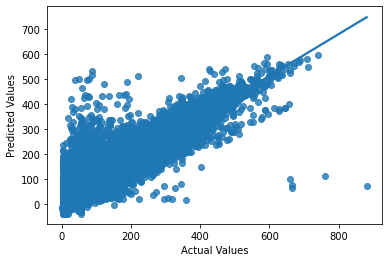

In [78]:
sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Text(0, 0.5, 'Predicted Values')

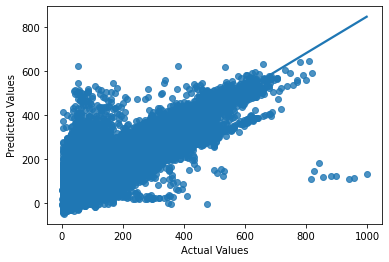

In [79]:
sns.regplot(y_train,y_pred_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Error Evaluation

In [80]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 31.839736835596458
RMSE for test set is 31.837123128945695


In [81]:
r2_train = metrics.r2_score(y_train,y_pred_train)
r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

R2 score for training set is 0.8351343668333805
R2 score for test set is 0.8345852784542678


In [82]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-x_train_comb.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-x_test_comb.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

Adjusted R2 score for training set is 0.8351195641975038
Adjusted R2 score for test set is 0.8345258548865842


**Lets load the data which is to be evaluated**

In [83]:
data_test = pd.read_csv("/content/drive/Othercomputers/My Laptop/INSAID/Capstone Project/Predict Beijing air pollution/Beijing-Air/beijing_test.csv")
data_test.head()

REF_NO  year  month  day  hour      PM10      SO2       NO2         CO  \
0   33649  2017      1    1     0 496.00000  8.00000 121.00000 6100.00000   
1   33650  2017      1    1     1 497.00000  7.00000 113.00000 6300.00000   
2   33651  2017      1    1     2 469.00000  7.00000 111.00000 6200.00000   
3   33652  2017      1    1     3 425.00000  6.00000 109.00000 5900.00000   
4   33653  2017      1    1     4 468.00000 10.00000 123.00000 7700.00000   

        O3     TEMP       PRES     DEWP    RAIN   wd    WSPM       station  
0  4.00000 -4.70000 1022.10000 -6.10000 0.00000  ENE 1.00000  Aotizhongxin  
1  4.00000 -5.20000 1022.30000 -6.40000 0.00000    E 0.70000  Aotizhongxin  
2  4.00000 -5.40000 1022.50000 -6.50000 0.00000  ENE 1.10000  Aotizhongxin  
3  3.00000 -5.20000 1022.50000 -6.20000 0.00000    E 1.10000  Aotizhongxin  
4 16.00000 -5.00000 1021.90000 -5.80000 0.00000  ENE 1.00000  Aotizhongxin

In [84]:
data_test.shape

(16728, 17)

In [85]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16728 entries, 0 to 16727
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   REF_NO   16728 non-null  int64  
 1   year     16728 non-null  int64  
 2   month    16728 non-null  int64  
 3   day      16728 non-null  int64  
 4   hour     16728 non-null  int64  
 5   PM10     16728 non-null  float64
 6   SO2      16728 non-null  float64
 7   NO2      16728 non-null  float64
 8   CO       16728 non-null  float64
 9   O3       16728 non-null  float64
 10  TEMP     16728 non-null  float64
 11  PRES     16728 non-null  float64
 12  DEWP     16728 non-null  float64
 13  RAIN     16728 non-null  float64
 14  wd       16728 non-null  object 
 15  WSPM     16728 non-null  float64
 16  station  16728 non-null  object 
dtypes: float64(10), int64(5), object(2)
memory usage: 2.2+ MB


The data is complete , we can move ahead for testing

In [86]:
data_test_new = data_test.drop(["REF_NO","station"], axis =1)

In [87]:
data_test_new.shape

(16728, 15)

Categorical and Continuous

In [88]:
data_test_cat = data_test_new.select_dtypes(include = ["object"])
data_test_cont = data_test_new.select_dtypes(exclude = ["object"])

In [89]:
data_test_cat.head()

wd
0  ENE
1    E
2  ENE
3    E
4  ENE

Encoding and scaling

In [90]:
data_test_OHE = enc.transform(data_test_cat)
data_test_OHE = pd.DataFrame(enc.transform(data_test_cat), columns = enc.get_feature_names(),  index = data_test_cat.index)
data_test_s = pd.DataFrame(scaler.transform(data_test_cont), columns =data_test_cont.columns , index = data_test_cont.index)
data_test_comb = pd.concat([data_test_OHE , data_test_s], axis = 1)

Predicting the result on the final test data

In [91]:
data_test.loc[:,"PM2.5"]=linreg.predict(data_test_comb)
#data_test_comb_result=linreg.predict(data_test)
solution = data_test.loc[:,["REF_NO","PM2.5"]]
solution.to_csv("/content/drive/Othercomputers/My Laptop/INSAID/Capstone Project/Predict Beijing air pollution/Beijing-Air/final_solution_beijing_air_pollution.csv",index=False,header=False)